# Лабораторная работа №1

## Задания:
- Найдите временной ряд с ценами активов (цены акций, облигаций, нефти, криптовалюты и т.д.)
- Отобразите временной ряд на графике
- Оцените его
- Сделайте начальные выводы
- Постройте 4 скользящие средние с окнами (5, 10, 30, 50)
- Оцените график с скользящими средними
- Сделайте предыдущие 2 пункта с экспоненциальными скользящими средними
- Сделайте прогноз движения актива на основе экспоненциального скользящего среднего на 5 периодов вперед.
- Сделайте выводы по проделанной работе и опишите их.

# Подключение глобально необходимых библиотек


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Загрузка датасета

In [ ]:
file_path = "aapl_us_2025.csv" 
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
1984-09-07,0.099824,0.101049,0.098619,0.099824,9.859472e+07
1984-09-10,0.099824,0.100130,0.097424,0.099232,7.652559e+07
1984-09-11,0.100130,0.102846,0.100130,0.101049,1.804519e+08
1984-09-12,0.101049,0.101641,0.098007,0.098007,1.576401e+08
1984-09-13,0.103460,0.103754,0.103460,0.103460,2.455186e+08


# 1. Временной ряд с ценами активов

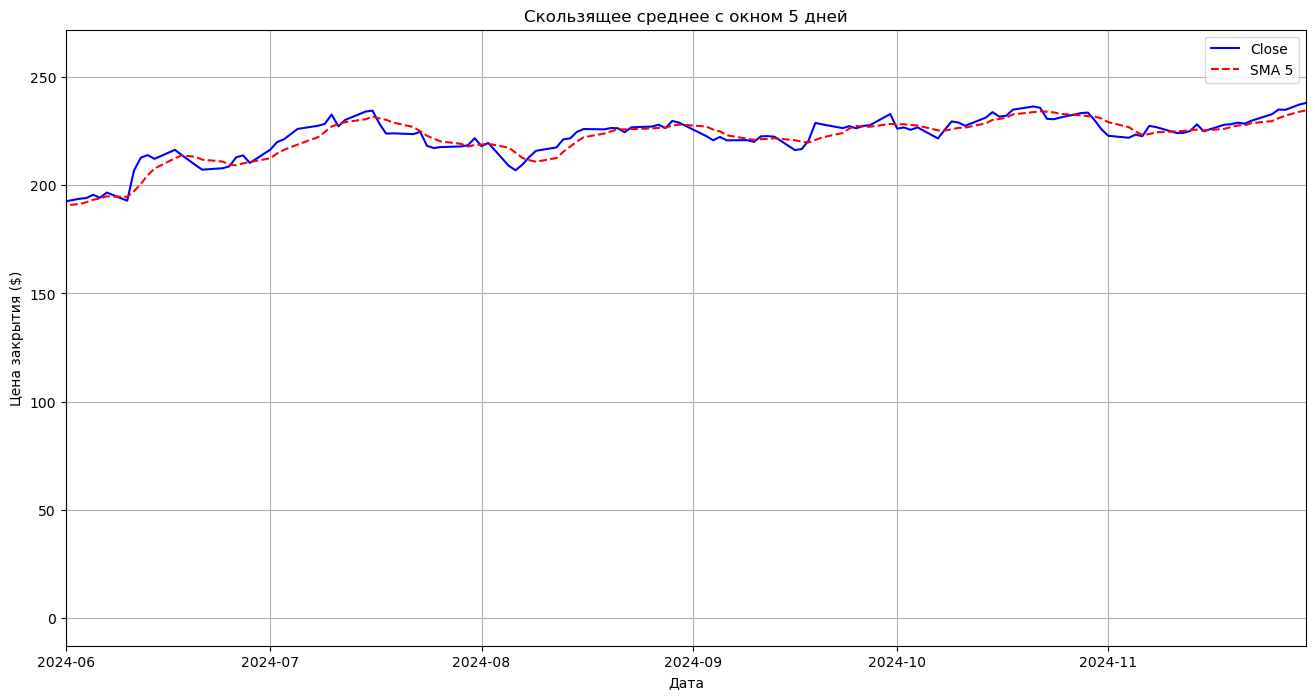

In [ ]:
df_value = df['Close']
rolling_5 = df_value.rolling(window=5).mean()

# Диапазон отображения
def set_plot_limits(start_date='2024-06-01', end_date='2024-11-30'):
    start_date_new = pd.to_datetime(start_date)
    end_date_new = pd.to_datetime(end_date)
    return start_date_new, end_date_new

plt.figure(figsize=(16, 8))
plt.plot(df_value, label='Close', color='blue')
plt.plot(rolling_5, label='SMA 5', color='red', linestyle='--')

start_date, end_date = set_plot_limits()
plt.xlim(start_date, end_date)

plt.title('Скользящее среднее с окном 5 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия ($)')
plt.legend()
plt.grid(True)
plt.show()

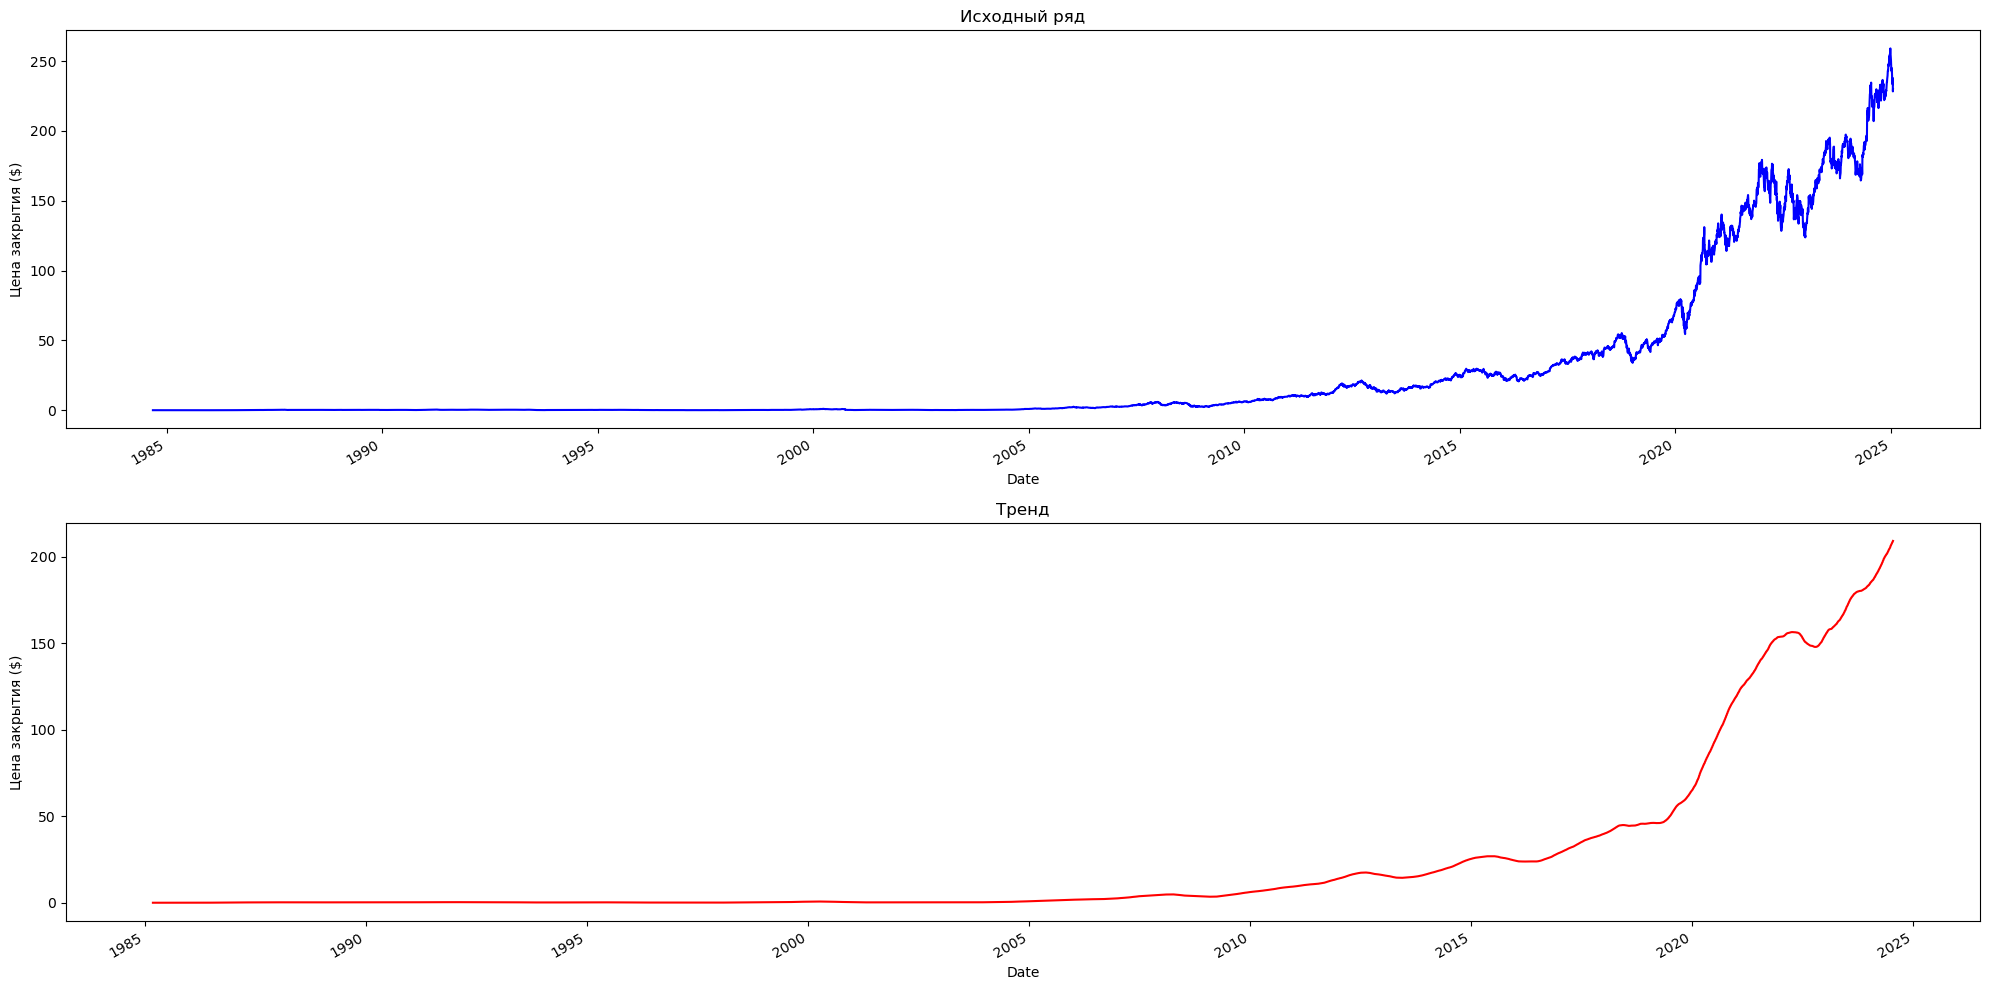

In [45]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
plt.rcParams['figure.figsize'] = [20, 10]

decomposition.observed.plot(ax=ax1, color='blue')
ax1.set_ylabel('Цена закрытия ($)')
ax1.set_title('Исходный ряд')

decomposition.trend.plot(ax=ax2, color='red')
ax2.set_ylabel('Цена закрытия ($)')
ax2.set_title('Тренд')

plt.tight_layout()
plt.show()

## Вывод на основе графиков
### Исходный ряд (верхний график):
На графике видно, что цена акций Apple демонстрировала относительно стабильный рост до 2020 года, после чего началась фаза резкого увеличения волатильности. Особенно заметны значительные колебания после 2022 года, что может быть связано с макроэкономическими факторами, изменениями в компании или общими тенденциями рынка.
### Тренд (нижний график):
График тренда показывает устойчивый долгосрочный рост стоимости акций. Особенно сильное ускорение наблюдается после 2020 года, когда тренд стал более выраженным. Это подтверждает, что несмотря на краткосрочные колебания и периоды высокой волатильности, цена акций Apple в целом следовала восходящему тренду, что указывает на стабильный рост компании и интерес инвесторов.

# 2 Скользящие средние

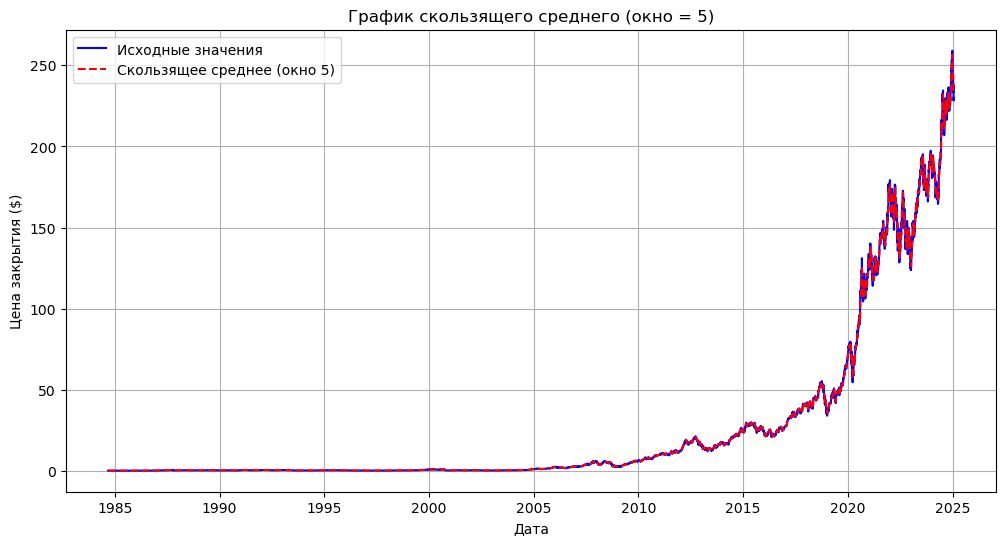

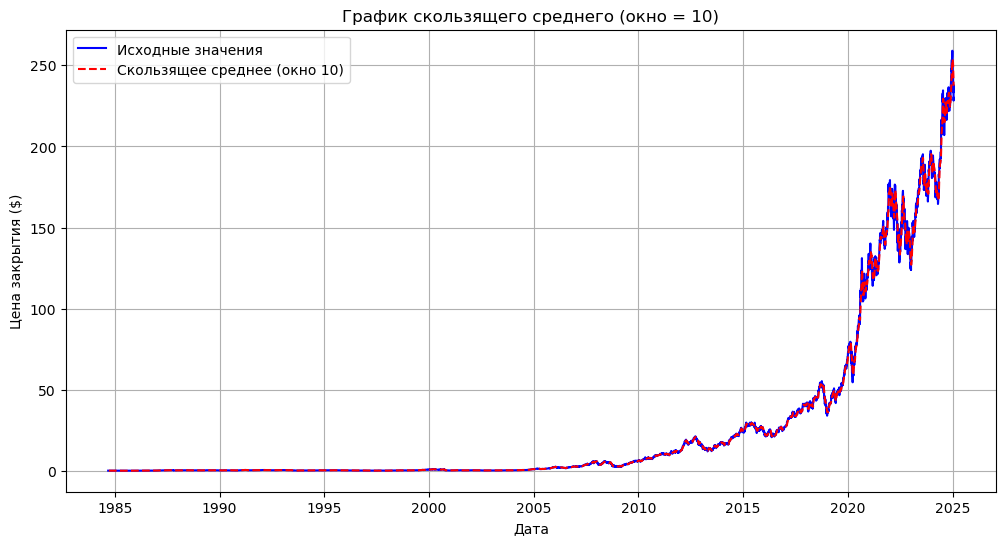

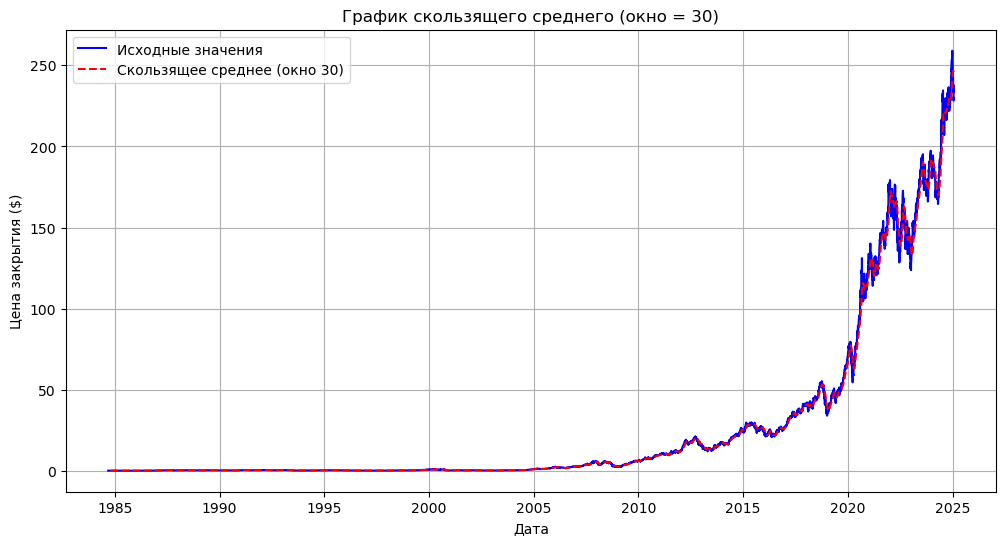

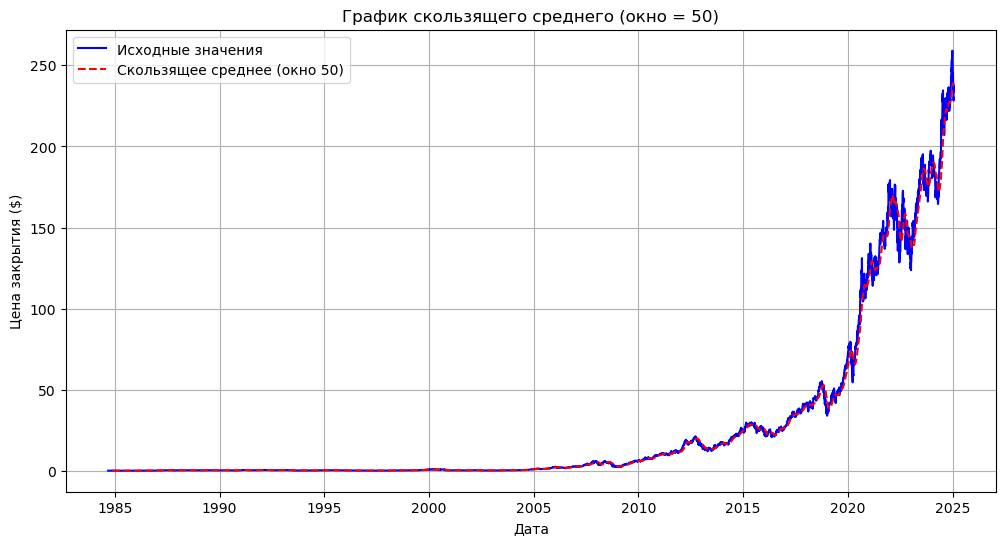

In [46]:
windows = [5, 10, 30, 50]

for i in windows:
    rolling_mean = df["Close"].rolling(window=i).mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Close"], label="Исходные значения", color='blue')
    plt.plot(df.index, rolling_mean, label=f"Скользящее среднее (окно {i})", color='red', linestyle='--')
    
    plt.xlabel("Дата")
    plt.ylabel("Цена закрытия ($)")
    plt.title(f"График скользящего среднего (окно = {i})")
    plt.legend()
    plt.grid(True)
    plt.show()


## Вывод по скользящим средним
**Скользящее среднее:**
На каждом графике отображены как исходные данные (Close), так и линия скользящего среднего (SMA) с разными значениями окна: 5, 10, 30 и 50. Окно определяет количество дней, за которое рассчитывается среднее значение и влияет на степень сглаживания временного ряда.

**Окно 5:**
Скользящее среднее почти полностью повторяет исходные значения. Поскольку окно маленькое, оно сохраняет все колебания, включая краткосрочные. Такой график удобен для анализа текущих движений, но он недостаточно «чистит» шум.

**Окно 10:**
График становится чуть более плавным. Скользящее среднее начинает приглушать краткосрочные колебания, однако все ещё чувствительно к локальным скачкам и резким изменениям. Видны элементы краткосрочного тренда.

**Окно 30:**
Скользящее среднее значительно сглаживает график. Небольшие флуктуации исчезают, а основной тренд становится более читаемым. Это окно удобно для анализа среднесрочных трендов и устойчивых направлений движения цены.

**Окно 50:**
Линия показывает общий долгосрочный тренд. Все краткосрочные скачки сглажены. Такой график подходит для инвесторов и аналитиков, оценивающих динамику в течение нескольких месяцев и выше.

**Аналитический вывод:**
Чем меньше окно, тем больше деталей и краткосрочной волатильности сохраняется в графике. Чем больше окно — тем глубже фильтрация, и тренд становится более гладким, игнорируя шум и краткосрочные флуктуации.
В терминах цифровой обработки сигналов (ЦОС), скользящие средние действуют как КИХ-фильтры, подавляющие высокочастотные компоненты (шум) временного ряда. Увеличение окна — эквивалент увеличения порядка фильтра, что приводит к более глубокой фильтрации.

# График экспоненциального скользящего среднего


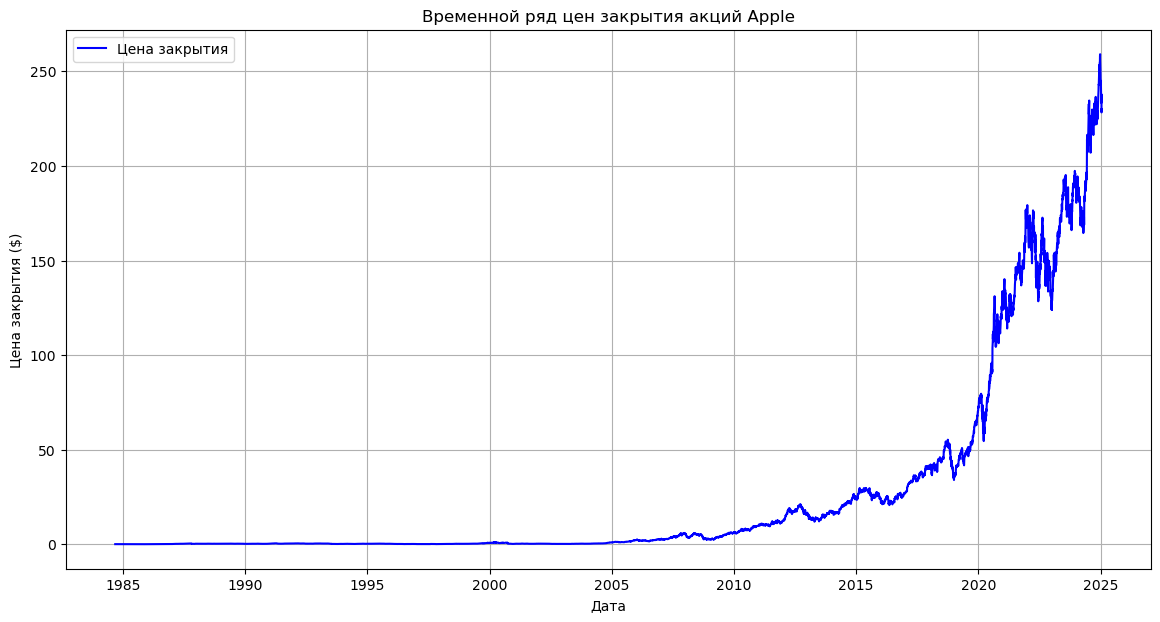

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Цена закрытия', color='blue')
plt.title('Временной ряд цен закрытия акций Apple')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия ($)')
plt.legend()
plt.grid(True)
plt.show()


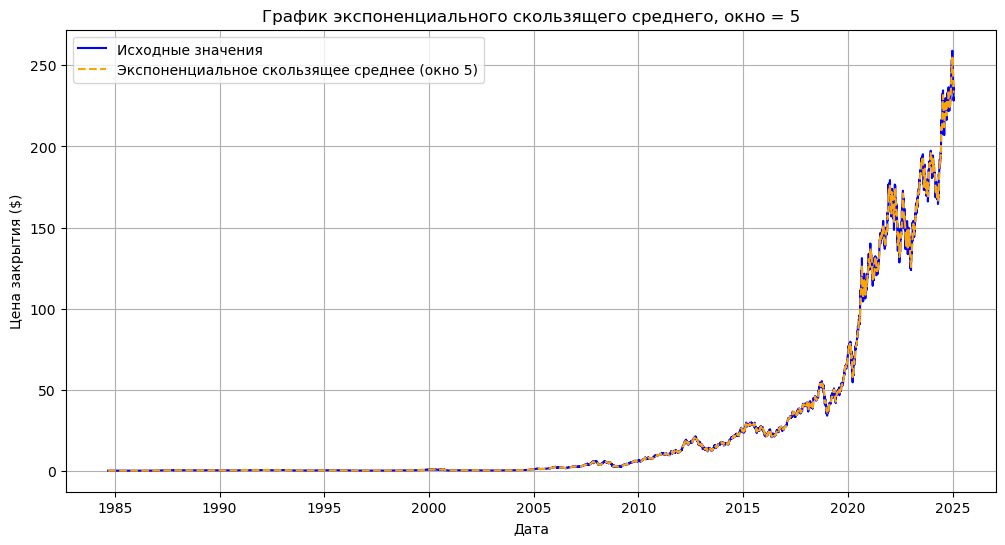

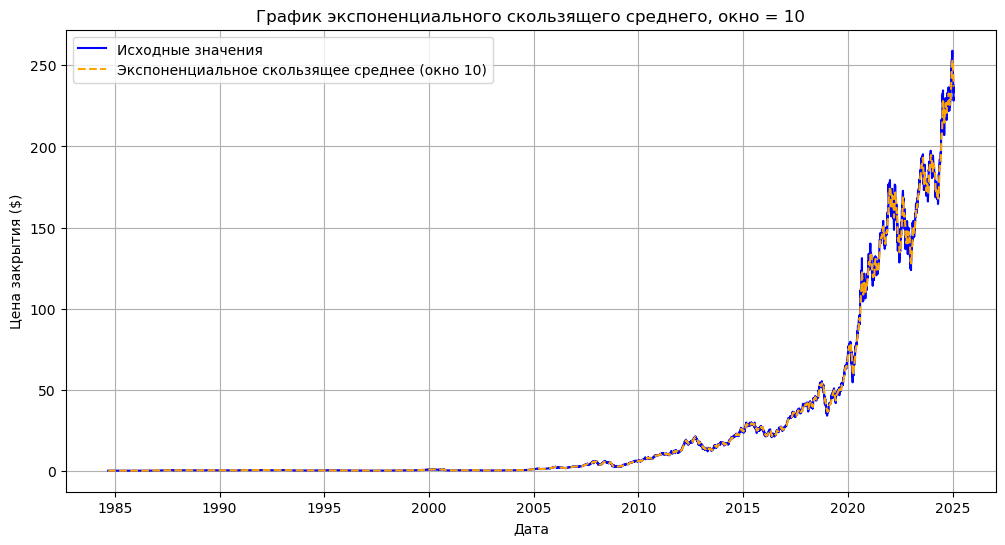

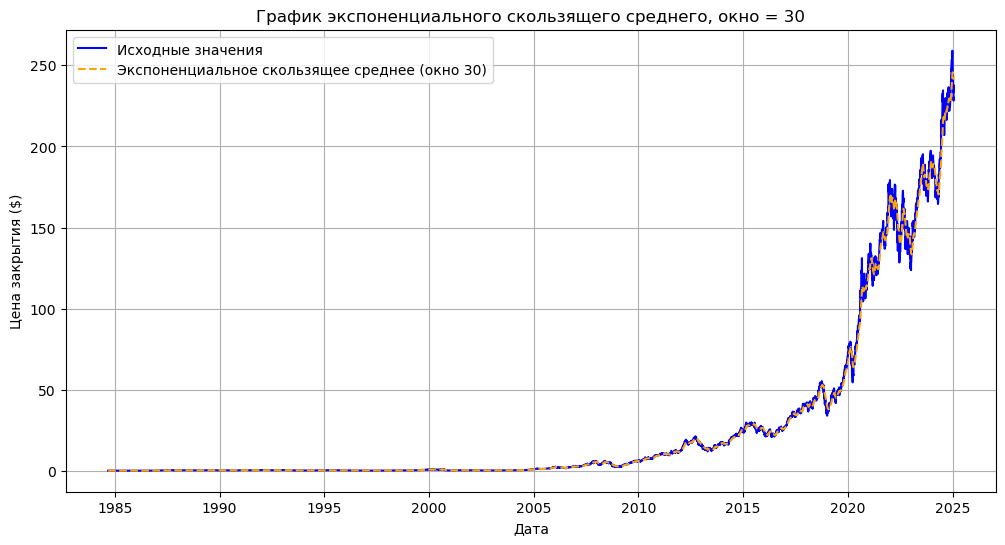

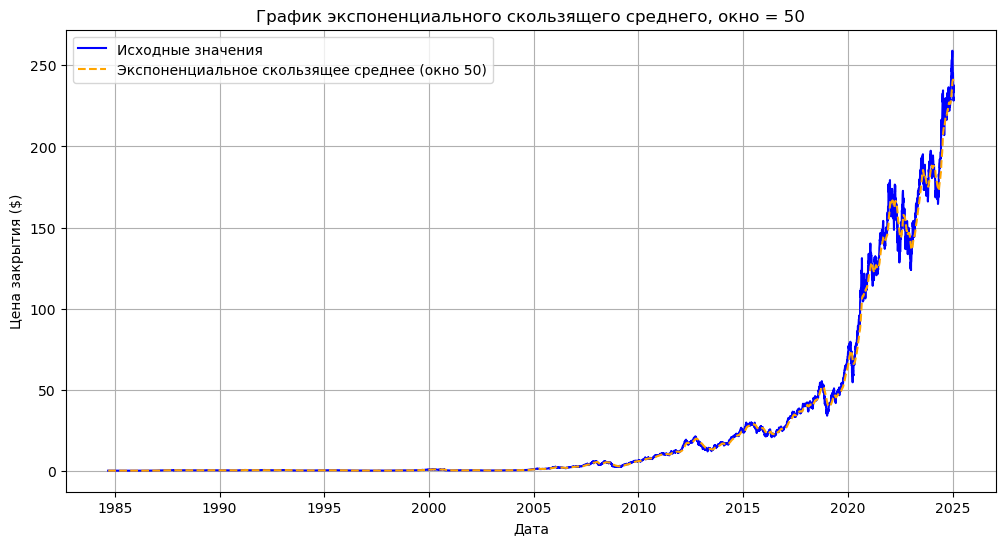

In [48]:
for i in [5, 10, 30, 50]:
    ema = df["Close"].ewm(span=i).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Close"], label="Исходные значения", color="blue")
    plt.plot(df.index, ema, label=f"Экспоненциальное скользящее среднее (окно {i})", color="orange", linestyle='--')
    plt.xlabel("Дата")
    plt.ylabel("Цена закрытия ($)")
    plt.title(f"График экспоненциального скользящего среднего, окно = {i}")
    plt.legend()
    plt.grid(True)
    plt.show()

В этом примере используется экспоненциальное скользящее среднее (EMA) вместо обычного скользящего среднего. Главное отличие заключается в том, что EMA придает больший вес последним данным, что делает его более чувствительным к недавним изменениям цены, в то время как обычное скользящее среднее равномерно распределяет вес на все значения внутри окна.

В итоге, EMA более подходит для тех случаев, когда важно учитывать последние изменения и быстрее реагировать на колебания рынка, в отличие от обычного скользящего среднего, которое больше фокусируется на общей тенденции. Т.е. экспоненциальное скользящее среднее больше подходит для краткосрочного планирования, а обычное скользящее среднее для долгосрочного.

# Прогнозирование с авторегрессионной моделью

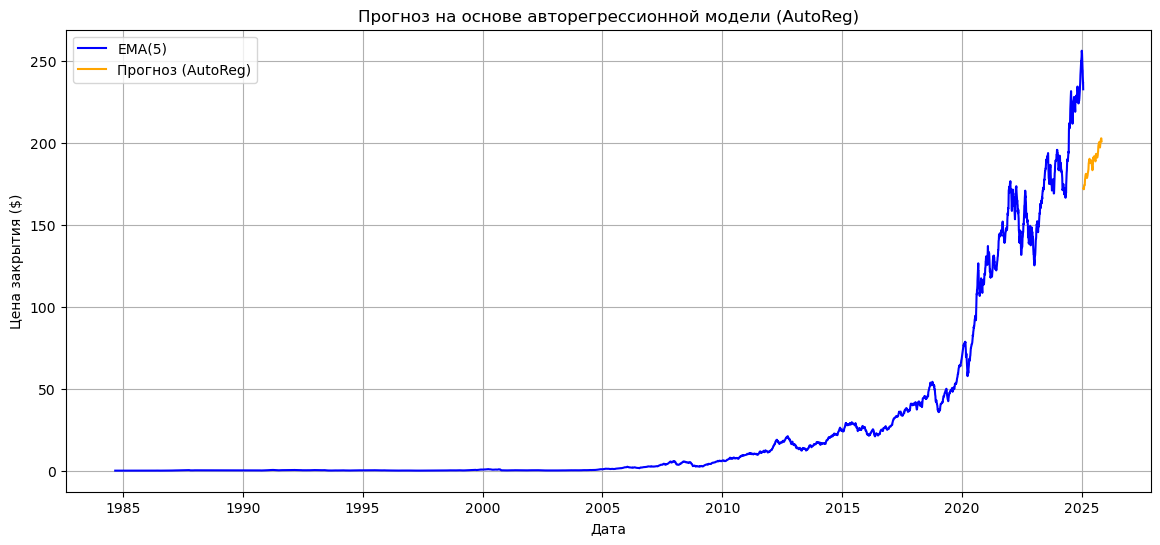

In [55]:
from statsmodels.tsa.ar_model import AutoReg

df = df.asfreq('B')
ema = df["Close"].ewm(span=5, adjust=False).mean()
forecast_len = 200
model = AutoReg(ema.dropna()[:-forecast_len], lags=300).fit()
forecast = model.forecast(steps=forecast_len)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_len+1, freq='B')[1:]

plt.figure(figsize=(14, 6))
plt.plot(df.index, ema, label="EMA(5)", color="blue")
plt.plot(forecast_index, forecast, label="Прогноз (AutoReg)", color="orange")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия ($)")
plt.title("Прогноз на основе авторегрессионной модели (AutoReg)")
plt.legend()
plt.grid(True)
plt.show()

Экспоненциальное скользящее среднее (EMA) сглаживает временной ряд, что позволяет лучше выявить основной тренд, устраняя краткосрочные колебания.

Прогноз, построенный с помощью авторегрессионной модели (AutoReg), следует этому сглаженному тренду. Это делает его хорошим инструментом для долгосрочного анализа, но при этом он может терять точность при краткосрочных колебаниях, особенно в периоды высокой волатильности.

## Заключение
В ходе лабораторной работы были изучены и реализованы методы анализа временных рядов, включая простые скользящие средние (SMA), экспоненциальные скользящие средние (EMA) и авторегрессионную модель (AutoReg). Эти методы позволили оценить тренды, сгладить ценовые колебания и выполнить прогнозирование.

Скользящие средние (SMA) помогли устранить краткосрочные шумы и выделить общие тенденции в данных. Малые окна (5, 10) выявили краткосрочные изменения, тогда как большие окна (30, 50) лучше отразили долгосрочные тренды.

Экспоненциальное скользящее среднее (EMA) показало более чувствительную реакцию на последние изменения в данных, делая его полезным для краткосрочного анализа. В отличие от SMA, EMA придаёт больший вес недавним значениям, что позволило быстрее выявить изменения на рынке.

Авторегрессионная модель (AutoReg) позволила построить прогноз на основе временного ряда. Прогноз следовал за сглаженной линией EMA, улавливая общий тренд, но при этом мог терять точность при резких краткосрочных изменениях.

В результате работы были получены инструменты для анализа временных рядов, которые могут применяться для прогнозирования цен активов и выявления рыночных тенденций. Для более точных прогнозов в будущем можно использовать более сложные модели, такие как ARIMA, LSTM или Prophet.